In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (7,7)
import numpy as np

In [2]:
from __future__ import print_function
import time, os, glob
import ROOT
from array import array
from hist_utils import *
import CMS_lumi

Welcome to JupyROOT 6.20/02


In [3]:
def make_pdf(h):

    sumOverY = {}
    for ix in range(1, h.GetNbinsX()+1):
        sumOverY[ix] = sum([h.GetBinContent(ix, iy_) for iy_ in range(1, h.GetNbinsY()+1)])
        for iy in range(1, h.GetNbinsY()+1):
            binc = h.GetBinContent(ix, iy)
            if sumOverY[ix] > 0.:
                h.SetBinContent(ix, iy, binc/sumOverY[ix])

    return h

In [4]:
samples = ['data2017', 'bg2017-dy']
#samples = ['data2017']
#ma, wgt = {}, {}
ma, pt, eta, pu = {}, {}, {}, {}
eta_range = 'cntr'
eta_range = 'mid'
eta_range = 'fwd'
eta_range = None

#fma.write('%f:%f:%f:%f\n'%(tree.ma[idx], tree.phoCalibEt[idx], tree.phoEta[idx], pu_))

for s in samples:
    #in_files = glob.glob('Templates/aod/%s*_ma1.txt'%s)
    #in_files = glob.glob('Templates/ZeeSel-Era16Feb2021-Zeev1/%s*_ma1.txt'%s)
    if 'data' in s:
        #in_files = glob.glob('Templates/ZeeSel-Era16Feb2021-Zeev1/%s-Run2017B_ma1.txt'%s)
        in_files = glob.glob('Templates/ZeeSel-Era16Feb2021-Zeev1/%s-Run2017*_ma1.txt'%s)
    else:
        #in_files = glob.glob('Templates/ZeeSel-Era16Feb2021-Zeev1/data2017-Run2017F_ma1.txt')
        in_files = glob.glob('Templates/ZeeSel-Era16Feb2021-Zeev1/%s*_ma1.txt'%s)
    print(in_files)
    
    #'''
    ma[s], pt[s], eta[s], pu[s] = [], [], [], []
    for in_file in in_files:
        f = open(in_file, "r")
        for i,l in enumerate(f):
            ma_, pt_, eta_, pu_ = l.replace('\n','').split(':')
            eta_ = float(eta_)
            if eta_range == 'cntr':
                if abs(eta_) > 0.5: continue
            elif eta_range == 'mid':
                if abs(eta_) <= 0.5 or abs(eta_) > 1.00: continue
            elif eta_range == 'fwd':
                if abs(eta_) <= 1.0 or abs(eta_) > 1.44: continue
            ma[s].append(float(ma_))
            pt[s].append(float(pt_))
            eta[s].append(float(eta_))
            pu[s].append(float(pu_))
            #if i >= 100000: break
            #if len(ma[s]) >= 100000: break

    ma[s] = np.array(ma[s])
    pt[s] = np.array(pt[s])
    eta[s] = np.array(eta[s])
    pu[s] = np.array(pu[s])
    
    #pt[s] = pt[s][ma[s] > -0.2]
    #ma[s] = ma[s][ma[s] > -0.2]
    assert len(ma[s] == pt[s])
    print(len(ma[s]), len(pt[s]))
    print(ma[s][:5])
    print(pt[s][:5])
    #'''

['Templates/ZeeSel-Era16Feb2021-Zeev1/data2017-Run2017B_ma1.txt', 'Templates/ZeeSel-Era16Feb2021-Zeev1/data2017-Run2017C_ma1.txt', 'Templates/ZeeSel-Era16Feb2021-Zeev1/data2017-Run2017D_ma1.txt', 'Templates/ZeeSel-Era16Feb2021-Zeev1/data2017-Run2017E_ma1.txt', 'Templates/ZeeSel-Era16Feb2021-Zeev1/data2017-Run2017F_ma1.txt']
19583389 19583389
[-1.       -0.088292 -0.042679  0.094709  0.087735]
[27.37306  31.083309 43.18013  37.664272 42.782734]
['Templates/ZeeSel-Era16Feb2021-Zeev1/bg2017-dy00_ma1.txt', 'Templates/ZeeSel-Era16Feb2021-Zeev1/bg2017-dy01_ma1.txt', 'Templates/ZeeSel-Era16Feb2021-Zeev1/bg2017-dy02_ma1.txt', 'Templates/ZeeSel-Era16Feb2021-Zeev1/bg2017-dy03_ma1.txt']
2707524 2707524
[ 0.186005  0.879379  0.057112 -1.        0.085573]
[34.930973 34.18858  23.264112 42.847454 40.976082]


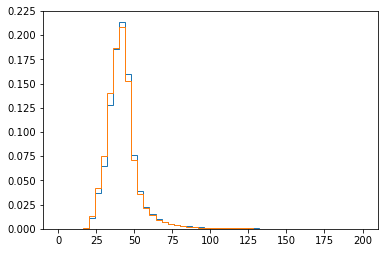

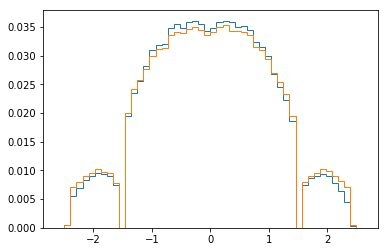

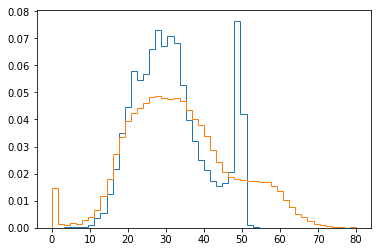

55.222984 99.996902


In [5]:
plt.hist(pt['data2017'], histtype='step', bins=50, range=(0., 200.), weights=np.ones_like(pt['data2017'])/len(pt['data2017']))
plt.hist(pt['bg2017-dy'], histtype='step', bins=50, range=(0., 200.), weights=np.ones_like(pt['bg2017-dy'])/len(pt['bg2017-dy']))
plt.show()

plt.hist(eta['data2017'], histtype='step', bins=50, range=(-2.6, 2.6), weights=np.ones_like(eta['data2017'])/len(eta['data2017']))
plt.hist(eta['bg2017-dy'], histtype='step', bins=50, range=(-2.6, 2.6), weights=np.ones_like(eta['bg2017-dy'])/len(eta['bg2017-dy']))
plt.show()

plt.hist(pu['data2017'], histtype='step', bins=50, range=(0., 80.), weights=np.ones_like(pu['data2017'])/len(pu['data2017']))
plt.hist(pu['bg2017-dy'], histtype='step', bins=50, range=(0., 80.), weights=np.ones_like(pu['bg2017-dy'])/len(pu['bg2017-dy']))
plt.show()

print(pu['data2017'].max(), pu['bg2017-dy'].max())

In [6]:
pt_bins_ = {}
pt_bins_[0] = [10]
pt_bins_[1] = np.arange(20, 90, 2)
pt_bins_[2] = np.arange(90, 140, 10)
pt_bins_[3] = np.arange(140, 180, 20)
pt_bins_[4] = np.arange(180, 1500+1320, 1320)
#pt_bins_[4] = np.arange(500, 1500+1000, 1000)
pt_bins = [pt_bins_[i] for i in pt_bins_]
pt_bins = np.concatenate(pt_bins).flatten()
pt_bins
#print(pt['data2017'].max())

array([  10,   20,   22,   24,   26,   28,   30,   32,   34,   36,   38,
         40,   42,   44,   46,   48,   50,   52,   54,   56,   58,   60,
         62,   64,   66,   68,   70,   72,   74,   76,   78,   80,   82,
         84,   86,   88,   90,  100,  110,  120,  130,  140,  160,  180,
       1500])

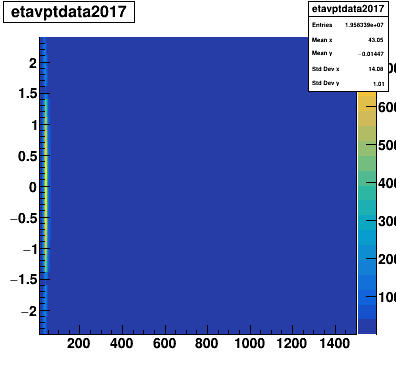

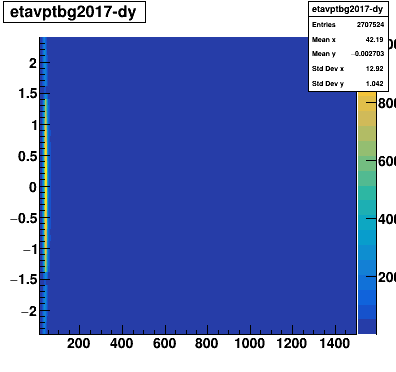

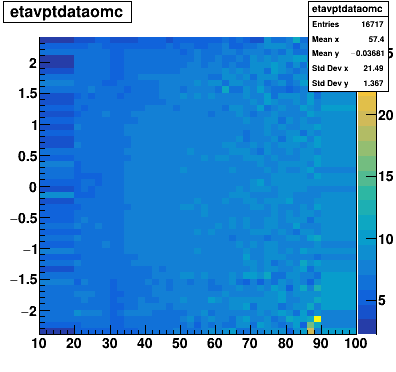

In [7]:
#'''
h, c = {}, {}

eta_edge = 2.4
#pt_lo, pt_hi = 20., 200.

s = 'data2017'
k = 'etavpt'+s
#h[k] = ROOT.TH2F(k, k, 50, pt_lo, pt_hi, 48, -eta_edge, eta_edge)
h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
i = 0
for p,e in zip(pt[s], eta[s]):
    h[k].Fill(p, e)
    i += 1
    #if i > 10000: break
h[k].Draw('COL Z')
c[k].Draw()

s = 'bg2017-dy'
k = 'etavpt'+s
#h[k] = ROOT.TH2F(k, k, 50, pt_lo, pt_hi, 48, -eta_edge, eta_edge)
h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
i = 0
for p,e in zip(pt[s], eta[s]):
    h[k].Fill(p, e)
    i += 1
    #if i > 10000: break
h[k].Draw('COL Z')
c[k].Draw()
#'''
#'''
k = 'etavptdataomc'
#h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
h[k] = h['etavptdata2017'].Clone()
h[k].SetName(k)
h[k].SetTitle(k)
h[k].Divide(h['etavptbg2017-dy'])
h[k].GetXaxis().SetRangeUser(10., 100.)
h[k].Draw('COL Z')
c[k].Draw()
#'''

In [8]:
def get_ptetawgt(pt_, eta_, h, ceil=10.):

    ipt_  = h.GetXaxis().FindBin(pt_)
    ieta_ = h.GetYaxis().FindBin(eta_)
    wgt = h.GetBinContent(ipt_, ieta_)
    if wgt > ceil:
        wgt = ceil

    return wgt

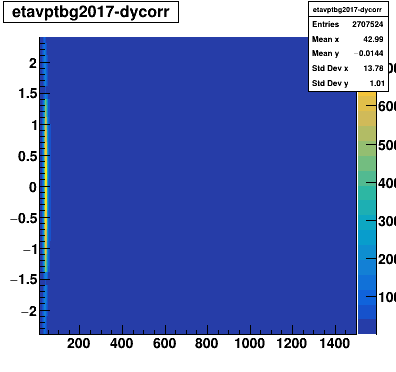

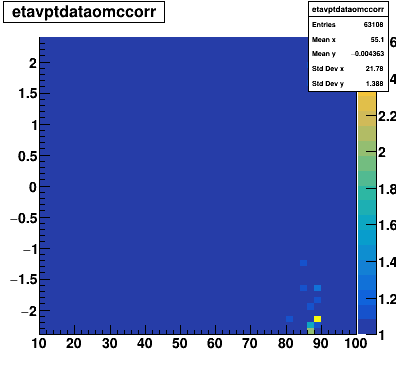

In [9]:
s = 'bg2017-dy'
k = 'etavpt'+s+'corr'
#h[k] = ROOT.TH2F(k, k, 50, pt_lo, pt_hi, 48, -eta_edge, eta_edge)
h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
i = 0
for p,e in zip(pt[s], eta[s]):
    #h[k].Fill(p, e)
    h[k].Fill(p, e, get_ptetawgt(p,e,h['etavptdataomc']))
    i += 1
    #if i > 10000: break
h[k].Draw('COL Z')
c[k].Draw()
#'''
#'''
k = 'etavptdataomc'+'corr'
#h[k] = ROOT.TH2F(k, k, len(pt_bins)-1, array('d', pt_bins), 48, -eta_edge, eta_edge)
c[k] = ROOT.TCanvas(k, k, 400, 400)
h[k] = h['etavptdata2017'].Clone()
h[k].SetName(k)
h[k].SetTitle(k)
h[k].Divide(h['etavptbg2017-dy'+'corr'])
h[k].GetXaxis().SetRangeUser(10., 100.)
h[k].Draw('COL Z')
c[k].Draw()
#'''

16946343.9353
150.078155518
16924188.0
135.0


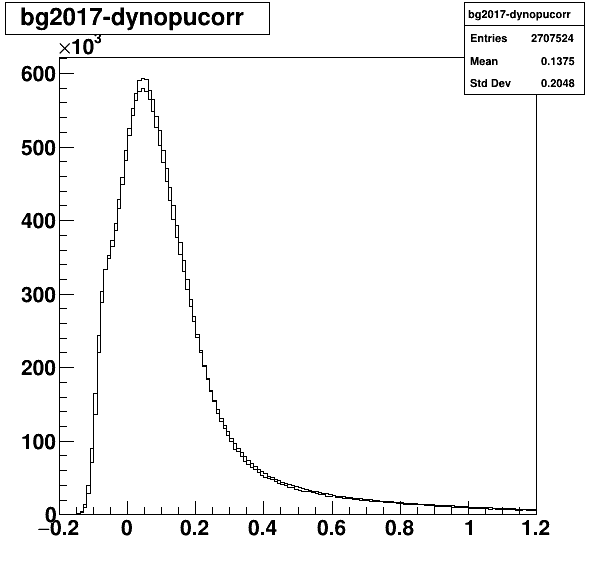

In [10]:
#h, c = {}, {}

#dM = 25
dM = 10
#dM = 100
ma_bins = np.arange(0,1400+dM,dM)-200
#ma_bins = np.arange(150,350+dM,dM)-200
#ma_bins = list(range(0,1200+dM,dM))
#ma_bins = [-400]+ma_bins
#ma_bins = [-400, -200]+ma_bins
ma_bins = [float(m)/1.e3 for m in ma_bins]
#print(len(ma_bins))
n_ma_bins = len(ma_bins)-1
ma_bins = array('d', ma_bins)
#print(ma_bins)

#k = 'bg2017-dy'
kmc = 'bg2017-dy'
k = kmc+'nopucorr'
#h[k] = ROOT.TH1F(k, k, 48, 0., 1.2)
#h[k] = ROOT.TH1F(k, k, 56, -0.2, 1.2)
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
c[k] = ROOT.TCanvas(k, k, 600, 600)
kpu = k+'pu'
h[kpu] = ROOT.TH1F(kpu, kpu, 20, 0., 100.)
for i,m in enumerate(ma[kmc]):
    #if i+1 >= 100000: break
    #m = (1./0.97)*(m - 0.006)
    #m = 1.036*m - 0.005
    #m = 0.946*m
    #m = 1.01*np.random.normal(m, 0.012) # with correction
    #h[k].Fill(m, wgt['DYToEE'][i])
    #h[k].Fill(m)
    wgt = get_ptetawgt(pt[kmc][i], eta[kmc][i], h['etavptdataomc'])
    h[k].Fill(m, wgt)
    h[kpu].Fill(pu[kmc][i], wgt)
h[k].Draw("hist")
c[k].cd()
c[k].Draw()
print(h[k].Integral())
print(h[k].GetBinContent(1))

k = 'data2017'
kdata = k
#h[k] = ROOT.TH1F(k, k, 48, 0., 1.2)
#h[k] = ROOT.TH1F(k, k, 56, -0.2, 1.2)
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
#c[k] = ROOT.TCanvas(k, k, 600, 400)
kpu = k+'pu'
h[kpu] = ROOT.TH1F(kpu, kpu, 20, 0., 100.)
for i,m in enumerate(ma[k]):
    #if i+1 >= 100000: break
    h[k].Fill(m)
    h[kpu].Fill(pu[k][i])
#h[k].Draw("hist")
h[k].Draw("hist same")
#c[k].Draw()
print(h[k].Integral())
print(h[k].GetBinContent(1))

In [11]:
print(h[kdata].GetMaximum())
print(h[kdata].GetMaximumBin())
print(h[kdata].GetXaxis().FindBin(0.))
print(ma_bins)
print(ma_bins[21-1])
print(ma_bins[25-1])
print(ma_bins[25+4-1])
print(ma_bins[20:30])

579843.0
25
21
array('d', [-0.2, -0.19, -0.18, -0.17, -0.16, -0.15, -0.14, -0.13, -0.12, -0.11, -0.1, -0.09, -0.08, -0.07, -0.06, -0.05, -0.04, -0.03, -0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05, 1.06, 1.07, 1.08, 1.09, 1.1, 1.11, 1.12, 1.13, 1.14, 1.15, 1.16, 1.17, 1.18, 1.19, 1.2])
0.0
0.04
0.08
array('d', [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09])


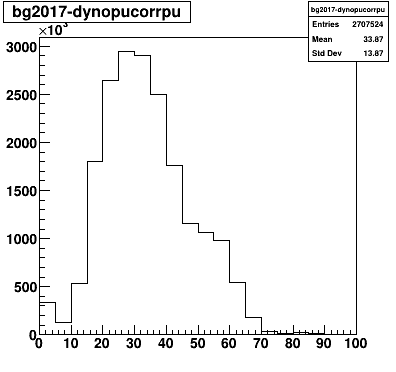

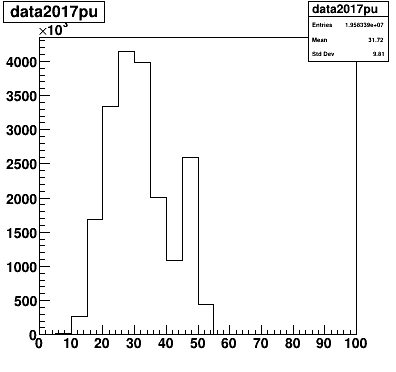

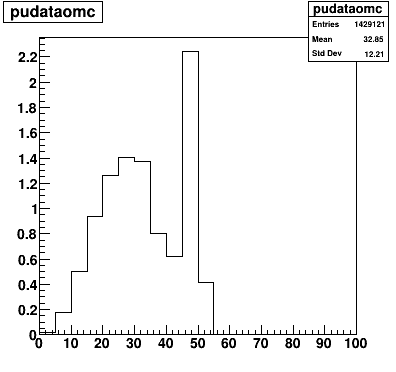

In [12]:
k = 'bg2017-dy'+'nopucorr'
kpu = k+'pu'
c[kpu] = ROOT.TCanvas(kpu, kpu, 400, 400)
h[kpu].Draw("hist")
c[kpu].Draw()

k = 'data2017'
kpu = k+'pu'
c[kpu] = ROOT.TCanvas(kpu, kpu, 400, 400)
h[kpu].Draw("hist")
c[kpu].Draw()

k = 'pudataomc'
c[k] = ROOT.TCanvas(k, k, 400, 400)
h[k] = h['data2017pu'].Clone()
h[k].SetName(k)
h[k].SetTitle(k)
h[k].Divide(h['bg2017-dy'+'nopucorr'+'pu'])
h[k].Draw('hist')
c[k].Draw()

In [13]:
def get_puwgt(pu_, h):
    ipu_ = h.GetXaxis().FindBin(pu_)
    wgt = h.GetBinContent(ipu_)
    return wgt

16957853.2831
128.743988037


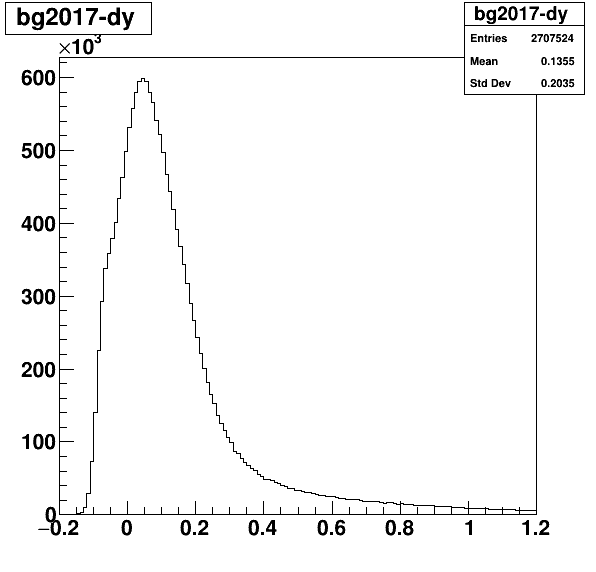

In [14]:
k = 'bg2017-dy'
scale_ = 1.#0.994
smear_ = 0.#0.002 #GeV
h[k] = ROOT.TH1F(k, k, n_ma_bins, ma_bins)
c[k] = ROOT.TCanvas(k, k, 600, 600)
for i,m in enumerate(ma[k]):
    wgt = get_ptetawgt(pt[k][i], eta[k][i], h['etavptdataomc'])*get_puwgt(pu[k][i], h['pudataomc'])
    h[k].Fill(m, wgt)
    #h[k].Fill(scale_*np.random.normal(m, smear_), wgt)
h[k].Draw("hist")
c[k].cd()
c[k].Draw()
print(h[k].Integral())
print(h[k].GetBinContent(1))

chi2 / ndf: 3440.936347 / 19.000000 = 181.101913
chi2 / ndf: 279775459.732943 / 34.000000 = 8228689.992145


"\nkdata:\nchi2 / ndf: 22004.949210 / 19.000000 = 1158.155222\nchi2 / ndf: 242491990.355582 / 34.000000 = 7132117.363399\n'\n NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE \n   1  Constant     8.94177e+04   2.95123e-01  -5.58182e-02   7.04075e-05\n   2  Mean         2.92373e-01   5.02394e-07   5.78156e-08  -9.58501e+01\n   3  Sigma        1.26809e-01 \n'\n FCN=10586.4 FROM MINOS     STATUS=SUCCESSFUL     20 CALLS         224 TOTAL\n                     EDM=6.61525e-10    STRATEGY= 1      ERROR MATRIX ACCURATE \n  EXT PARAMETER                                   STEP         FIRST   \n  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE \n   1  Constant     5.69722e+05   2.36604e+02   2.90534e-01  -6.34418e-09\n   2  Mean         4.73283e-02   8.04323e-05   5.93537e-07   4.17020e-03\n   3  Sigma        9.95631e-02   9.46228e-05   9.46228e-05   1.04463e-02\n                               ERR DEF= 0.5\n FCN=2.42492e+08 FROM MIGRAD    STATUS=CONVERGE

 FCN=14772.6 FROM MINOS     STATUS=SUCCESSFUL     20 CALLS         197 TOTAL
                     EDM=8.91223e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.94126e+05   2.43328e+02   3.55085e-01  -7.24246e-09
   2  Mean         4.70145e-02   7.20488e-05   6.15747e-07   4.70343e-03
   3  Sigma        9.50440e-02   8.21365e-05   8.21365e-05   5.26239e-03
                               ERR DEF= 0.5
 FCN=2.79775e+08 FROM MIGRAD    STATUS=CONVERGED     416 CALLS         417 TOTAL
                     EDM=4.59301e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  bg-mu        2.39188e-01   4.43339e-07   4.55473e-09   9.79366e+01
   2  bg-sigma     5.97502e-02   3.05735e-07 

Warning in <TCanvas::Constructor>: Deleting canvas with same name: res
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 


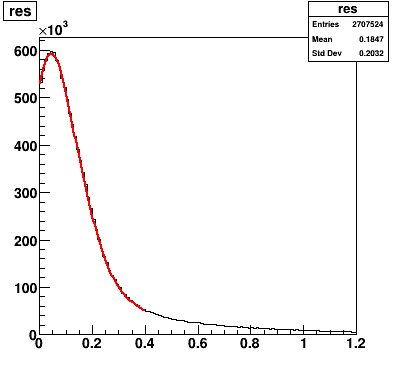

In [125]:
from array import array
#'''
k = kdata
k = kmc
sg = ROOT.TF1("sg","gaus",-0.1, 0.4)
sg.SetParameter(1,0.08)
sg.SetParameter(2,0.5)
sg.SetParLimits(1,0.,0.1)
sg.SetParLimits(2,0.,0.5)
sg.SetLineColor(2)
h[k].Fit('sg', 'LLIEMNS', '', -0.1, 0.12)
#sg.Draw('same')
chi2 = sg.GetChisquare()
ndof = sg.GetNDF()
pval = sg.GetProb()
print('chi2 / ndf: %f / %f = %f'%(chi2, ndof, chi2/ndof))
params_sg = array('d',[0.,0.,0.])
sg.GetParameters(params_sg)
#'''

#'''

kres = 'res'
c[kres] = ROOT.TCanvas(kres, kres, 400, 400)
c[kres].SetLeftMargin(1.8)
h[kres] = h[k].Clone()
h[kres].SetName(kres)
h[kres].SetTitle(kres)
'''
h[kres].Reset()
for ib in range(h[kmc].GetNbinsX()+1):
    res_ = h[kmc].GetBinContent(ib) - sg.Eval(h[kmc].GetBinCenter(ib))
    h[kres].SetBinContent(ib, res_)
    #print(h[kmc].GetBinCenter(ib), h[kmc].GetBinContent(ib), sg.Eval(h[kmc].GetBinCenter(ib)), res_, h[kres].GetBinContent(ib))
    #print(res_)
'''
h[kres].GetXaxis().SetRangeUser(0.,1.2)
h[kres].Draw("hist")

def log_norm(x, par):
    
    #log-normal
    #arg2 = (ROOT.TMath.Log(x[0]-par[3]) - par[1])/par[2] if par[2] != 0. else 0.
    #arg2 = (ROOT.TMath.Log((x[0]-par[3])/par[1]))/par[2] if par[2] != 0. and par[1] != 0 else 0.
    #bgval = par[0]*ROOT.TMath.Exp(-0.5*arg2*arg2)/(x[0]-par[3]) if x[0] != 0 else 0.
    
    #arg2 = (x[0] - par[1])/par[2] if par[2] != 0. else 0.
    #bgval = par[0]*ROOT.TMath.Exp(-0.5*arg2*arg2)*ROOT.TMath.Exp(par[3]*(x[0]-par[4]))
    bgval = par[2]*ROOT.TMath.Landau(x[0], par[0], par[1],0)
    
    arg = (x[0] - par[4])/par[5] if par[5] != 0. else 0.
    sgval = par[3]*ROOT.TMath.Exp(-0.5*arg*arg)
    #fitval = sgval
    #fitval = bgval
    fitval = bgval+sgval
    return fitval


bg = ROOT.TF1("bg", log_norm, -0.2, 0.4, 6)
#bg = ROOT.TF1("bg", "[2]*TMath::Landau(x,[0],[1],0)", 0., 1.2)
#bg = ROOT.TF1("bg", "gaus(0)", 0., 1.2)
#bg.FixParameter(0, 3.e3)
#bg.FixParameter(1, 2.)
#bg.FixParameter(2, 0.035)
#bg.FixParameter(3, -7.2)

#bg.FixParameter(0, 2.e2)
#bg.FixParameter(1, .8)
#bg.FixParameter(2, 0.02)
#bg.FixParameter(3, -0.7)

#bg.FixParameter(0, 0.25)
#bg.FixParameter(1, 6.e-2)
bg.SetParLimits(0,0.15,0.3)
bg.SetParLimits(1,4.e-2,7.e-2)
bg.SetParLimits(2,5.e5,6.e5)
#bg.FixParameter(2, 10.)
#bg.FixParameter(3, 0.)

#bg.SetParLimits(0,8.e3,9.e5)
#bg.SetParLimits(1,0.2,0.4)
#bg.SetParLimits(2,0.1,.2)
#bg.FixParameter(3, 3.e1)
#bg.FixParameter(4, 0.2)

bg.SetParLimits(3, 5.e5, 6.e5)
bg.SetParLimits(4, 0., 0.2)
bg.SetParLimits(5, 0.08, 0.12)
bg.SetParNames("bg-mu","bg-sigma","bg-cons", 'sg-cons', 'sg-mu', 'sg-sigma')
h[kres].Fit('bg',"W","", -0.05, 0.4)

bg.SetLineColor(2)
#bg.GetYaxis().SetRangeUser(0., 0.3)
bg.Draw('same')
chi2 = bg.GetChisquare()
ndof = bg.GetNDF()
pval = bg.GetProb()
print('chi2 / ndf: %f / %f = %f'%(chi2, ndof, chi2/ndof))
c[kres].Draw()
#'''
'''
kdata:
chi2 / ndf: 22004.949210 / 19.000000 = 1158.155222
chi2 / ndf: 242491990.355582 / 34.000000 = 7132117.363399
 FCN=10586.4 FROM MINOS     STATUS=SUCCESSFUL     20 CALLS         224 TOTAL
                     EDM=6.61525e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.69722e+05   2.36604e+02   2.90534e-01  -6.34418e-09
   2  Mean         4.73283e-02   8.04323e-05   5.93537e-07   4.17020e-03
   3  Sigma        9.95631e-02   9.46228e-05   9.46228e-05   1.04463e-02
                               ERR DEF= 0.5
 FCN=2.42492e+08 FROM MIGRAD    STATUS=CONVERGED     378 CALLS         379 TOTAL
                     EDM=7.47237e-09    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  bg-mu        2.51191e-01   4.67374e-07   2.55257e-09   9.09406e+00
   2  bg-sigma     6.20752e-02   3.30110e-07   1.00961e-08  -2.03028e+00
   3  bg-cons      6.00000e+05   4.10640e-04  -1.09135e-07** at limit **
   4  sg-cons      5.74350e+05   3.42650e-01   7.83497e-09  -1.56524e+01
   5  sg-mu        4.57422e-02   1.97653e-07   1.56444e-09  -4.77807e+01
   6  sg-sigma     9.45799e-02   1.32478e-07  -9.39211e-09   2.73023e+00
   
kmc:
chi2 / ndf: 3440.936347 / 19.000000 = 181.101913
chi2 / ndf: 279775459.732943 / 34.000000 = 8228689.992145
 FCN=14772.6 FROM MINOS     STATUS=SUCCESSFUL     20 CALLS         197 TOTAL
                     EDM=8.91223e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.94126e+05   2.43328e+02   3.55085e-01  -7.24246e-09
   2  Mean         4.70145e-02   7.20488e-05   6.15747e-07   4.70343e-03
   3  Sigma        9.50440e-02   8.21365e-05   8.21365e-05   5.26239e-03
                               ERR DEF= 0.5
 FCN=2.79775e+08 FROM MIGRAD    STATUS=CONVERGED     416 CALLS         417 TOTAL
                     EDM=4.59301e-07    STRATEGY= 1  ERROR MATRIX UNCERTAINTY   1.2 per cent
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  bg-mu        2.39188e-01   4.43339e-07   4.55473e-09   9.79366e+01
   2  bg-sigma     5.97502e-02   3.05735e-07  -1.27067e-08  -1.46451e+01
   3  bg-cons      6.00000e+05   5.09404e-04  -2.68061e-08** at limit **
   4  sg-cons      5.92340e+05   3.57619e-01   3.68680e-08  -1.13145e+02
   5  sg-mu        4.60391e-02   1.98106e-07   1.18175e-09  -2.40943e+02
   6  sg-sigma     9.31508e-02   1.28976e-07  -5.38009e-09  -8.94989e+00
'''

max: 0.0354646742344
41.9 fb^{-1} (13 TeV)


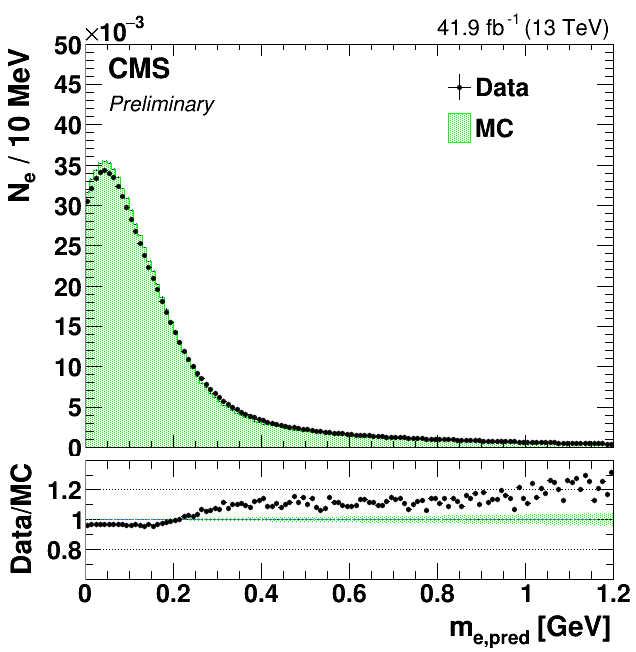

In [20]:
hc = {}

do_trunc = True
#do_trunc = False

ROOT.gStyle.SetPadTickX(1)
ROOT.gStyle.SetPadTickY(1)
#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Preliminary"
CMS_lumi.lumi_sqrtS = "41.9 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
iPos = 11
if( iPos==0 ): CMS_lumi.relPosX = 0.12
iPeriod = 0

err_style = 'E2'
fill_style = 3002
wd, ht = int(640*1), int(680*1)
ROOT.TGaxis.fgMaxDigits = 3
#ROOT.gStyle.SetErrorX(0)
#ROOT.gStyle.SetOptStat(0)

k = kdata
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)

pUp = ROOT.TPad("upperPad", "upperPad",.005, .300, .995, .995) # (,,Double_t xlow, Double_t ylow, Double_t xup, Double_t yup,...)
pDn = ROOT.TPad("lowerPad", "lowerPad",.005, .005, .995, .300)
pUp.Draw()
pDn.Draw()
pUp.SetMargin(13.e-02,3.e-02,2.e-02,9.e-02) # (Float_t left, Float_t right, Float_t bottom, Float_t top)
pDn.SetMargin(13.e-02,3.e-02,36.e-02,2.e-02) # (Float_t left, Float_t right, Float_t bottom, Float_t top)

pUp.cd()

# dummy hist for drawing axes
hdummy = h[k].Clone()
hdummy.Reset()
hdummy.SetName('dummy')
hdummy = set_hist(hdummy, "m_{e,pred} [GeV]", "N_{a}", "")
hdummy.GetYaxis().SetTitle('N_{e} / %d MeV'%dM)
hdummy.GetXaxis().SetTitle('')
hdummy.GetXaxis().SetLabelSize(0.)
hdummy.GetYaxis().SetTitleOffset(0.9)
hdummy.GetYaxis().SetTitleSize(0.07)
hdummy.GetYaxis().SetLabelSize(0.06)
hdummy.GetYaxis().SetMaxDigits(3)
hdummy.SetLineColor(0)
hdummy.Draw("hist")

# Plot MC
k = kmc
#if h[k].Integral() > 1.:
#    h[k].Scale(1./h[k].Integral())
if h[kdata].Integral() > 1.:
    h[kdata].Scale(1./h[kdata].Integral())
h[k].Scale(h[kdata].Integral()/h[kmc].Integral())
print('max:',h[k].GetMaximum())
# Plot fill
hc[k] = h[k].Clone()
hc[k].SetLineColor(3)
hc[k].SetFillColor(3)
hc[k].SetFillStyle(fill_style)
hc[k].SetStats(0)
hc[k].Draw("hist same")
# Plot uncertainty
h[k].SetLineColor(9)
h[k].SetFillColor(9)
h[k].SetFillStyle(fill_style)
h[k].SetStats(0)
h[k].Draw("%s same"%err_style)

# Plot data
k = kdata
#if h[k].Integral() > 1.:
#    h[k].Scale(1./h[k].Integral())
hc[k] = h[k].Clone()
hc[k].SetName(kdata+'errs')
hc[k].SetFillStyle(0)
hc[k].SetMarkerStyle(20)
#hc[k].SetMarkerSize(0.85)
hc[k].SetMarkerSize(0.7)
hc[k].SetStats(0)
hc[k].Draw("E same")

#if ymax_ is None and hc[k].GetBinContent(2) > 0.:
ymax_lowbin = 1 if do_trunc else 2
if dM == 100:
    ymax = 6.e6
elif dM == 10:
    ymax = 6.e5
else:
    ymax = 1.3*max(np.max([hc[kdata].GetBinContent(ib) for ib in range(ymax_lowbin, hc[kdata].GetNbinsX()+2)]),
                   np.max([hc[kmc].GetBinContent(ib) for ib in range(ymax_lowbin, hc[kmc].GetNbinsX()+2)]))
#ymax = 6.e5 #dM=10
ymax = 4.e4
ymax = 1.2*h[kdata].GetMaximum()
ymax = 8.e5
ymax = 0.05
#hdummy.GetYaxis().SetRangeUser(0.1, ymax)
hdummy.GetYaxis().SetRangeUser(0., ymax)
if do_trunc:
    hdummy.GetXaxis().SetRangeUser(0., 1.2)
else:
    hdummy.GetXaxis().SetRangeUser(-0.2, 1.2)
ROOT.gPad.RedrawAxis()

l, l2, hatch = {}, {}, {}
legend = {}

hatch[k] = ROOT.TGraph(2, array('d',[0.,0.]), array('d',[0.,ymax]));
hatch[k].SetLineColor(14)
hatch[k].SetLineWidth(5001)
#hatch[k].SetLineWidth(5)
hatch[k].SetFillStyle(3004)
#hatch[k].SetFillColor(14)
hatch[k].SetFillColor(12)
#ROOT.gStyle.SetHatchesLineWidth(2)
hatch[k].Draw("same")

legend[k] = ROOT.TLegend(0.7,0.68,0.9,0.86) #(x1, y1, x2, y2)
legend[k].AddEntry(kdata+'errs', "Data", "lep")
legend[k].AddEntry(h[kmc].GetName(), "MC", "f")
legend[k].SetBorderSize(0)
legend[k].Draw("same")

CMS_lumi.CMS_lumi(pUp, iPeriod, iPos)

##### Ratio plots on lower pad #####
pDn.cd()
pDn.SetTicky()
pDn.SetGridy()
#'''
if do_trunc:
    fUnity = ROOT.TF1("fUnity","[0]",0.,1.2)
else:
    fUnity = ROOT.TF1("fUnity","[0]",-0.2,1.2)
fUnity.SetParameter( 0,1. )

fUnity.GetXaxis().SetTitle("m_{e,pred} [GeV]")
fUnity.GetXaxis().SetTickLength(0.1)
fUnity.GetXaxis().SetTitleOffset(1.05)
fUnity.GetXaxis().SetTitleSize(0.16)
fUnity.GetXaxis().SetLabelSize(0.14)
#if not do_trunc:
#    fUnity.GetXaxis().ChangeLabel(1,-1, 0,-1,-1,-1,"")
#    fUnity.GetXaxis().ChangeLabel(2,-1,-1,-1,-1,-1,"#font[22]{#gamma_{veto}}")

#dY = 0.199
dY = 0.399
#fUnity.GetYaxis().SetTitle("SB/SR")
fUnity.GetYaxis().SetTitle("Data/MC")
#fUnity.GetYaxis().SetRangeUser(1.-dY,1.+dY)
fUnity.SetMaximum(1.+dY)
fUnity.SetMinimum(1.-dY)
fUnity.GetYaxis().SetNdivisions(305)
fUnity.GetYaxis().SetTickLength(0.04)
fUnity.GetYaxis().SetLabelFont(62)
fUnity.GetYaxis().SetTitleFont(62)
fUnity.GetYaxis().SetTitleOffset(.4)
fUnity.GetYaxis().SetTitleSize(0.16)
fUnity.GetYaxis().SetLabelSize(0.14)

fUnity.SetLineColor(9)
fUnity.SetLineWidth(1)
fUnity.SetLineStyle(7)
fUnity.SetTitle("")
fUnity.Draw()

# Data error bands
#k = kdata
#kr = kdata+'err'
# MC error bands
k = kmc
kr = kmc+'errs'
h[kr] = ROOT.TGraphAsymmErrors()
h[kr].SetName(kr)
for i in range(h[k].GetNbinsX()-1):
    ib = i+2
    h[kr].SetPoint(i, h[k].GetBinCenter(ib), 1.)
    h[kr].SetPointError(
        i,
        h[k].GetBinWidth(ib)/2.,
        h[k].GetBinWidth(ib)/2.,
        (h[k].GetBinError(ib)/h[k].GetBinContent(ib)),
        (h[k].GetBinError(ib)/h[k].GetBinContent(ib)),
        )
#h[kr].SetFillColor(9)
h[kr].SetFillColor(3)
h[kr].SetFillStyle(3002)
h[kr].Draw("E2 same")

# Data errors
kr = 'dataomc'+'errs'
h[kr] = h[kdata].Clone()
h[kr].Reset()
h[kr].SetName(kr)
for ib in range(1, h[k].GetNbinsX()+1):
    obs = h[kdata].GetBinContent(ib)
    obs_err = h[kdata].GetBinError(ib)
    bkg = h[kmc].GetBinContent(ib)
    if bkg == 0.: continue
    bkg_err = h[kmc].GetBinError(ib)
    h[kr].SetBinContent(ib, obs/bkg)
    h[kr].SetBinError(ib, obs_err/obs)
#h[kr].SetLineColor(9)
h[kr].SetStats(0)
#h[kr].Divide(h[kmc])
h[kr].SetMarkerStyle(20)
#h[kr].SetMarkerSize(0.85)
h[kr].SetMarkerSize(0.7)
h[kr].SetMarkerColor(1)
h[kr].SetLineColor(1) #9
h[kr].Draw("ep same")

k = kr
#l[k] = ROOT.TLine(0.135, 1.-dY, 0.135, 1.+dY) # x0,y0, x1,y1
#l[k].SetLineColor(14)
#l[k].SetLineStyle(7)
#l[k].Draw("same")

#l2[k] = ROOT.TLine(0.55, 1.-dY, 0.55, 1.+dY) # x0,y0, x1,y1
#l2[k].SetLineColor(14)
#l2[k].SetLineStyle(7)
#l2[k].Draw("same")

hatch[k] = ROOT.TGraph(2, array('d',[0.,0.]), array('d',[1.-dY,1.+dY]));
hatch[k].SetLineColor(14)
hatch[k].SetLineWidth(5001)
hatch[k].SetFillStyle(3004)
hatch[k].SetFillColor(14)
hatch[k].Draw("same")
#'''

k = kdata
c[k].Draw()
c[k].Update()
#c[k].Print('Plots/%s_sb2srvsr_blind_%s.eps'%(samples, blind))
#c[k].Print('Plots/%s_sb2srvsr_blind_%.eps'%(samples, blind))
#samples_str = '_'.join(samples)
#c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_nocorr_noptrwgt.pdf'%dM)
#c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_nocorr_ptrwgt.pdf'%dM)
#c[k].Print('Plots/Run2017_DYToEE_dataomc_blind_None_dataallma1o%dMeV_corr_ptrwgt.pdf'%dM)

#draw_hist_1dmastacked()

13 TeV


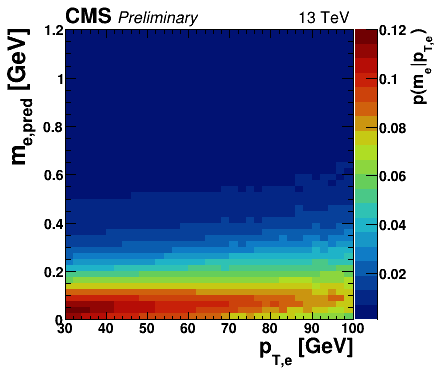

In [8]:
make_2dpdf = True

plot_dir = 'Plots/massreg/draft1'
print_pdf = False #True

#change the CMS_lumi variables (see CMS_lumi.py)
CMS_lumi.lumi_7TeV = "4.8 fb^{-1}"
CMS_lumi.lumi_8TeV = "18.3 fb^{-1}"
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "Preliminary"
#CMS_lumi.lumi_sqrtS = "41.9 fb^{-1} (13 TeV)" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
CMS_lumi.lumi_sqrtS = "13 TeV" # used with iPeriod = 0, e.g. for simulation-only plots (default is an empty string)
CMS_lumi.lumiTextSize = 0.6
CMS_lumi.cmsTextSize = 0.75
iPos = 0
if( iPos==0 ): CMS_lumi.relPosX = 0.18
iPeriod = 0

wd, ht = int(440*1), int(400*1)
k = 'hmEvPt'
#'''
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
#h[k] = ROOT.TH2F(k, k, 50, 20., 100., 48, 0., 1.2)
h[k] = ROOT.TH2F(k, k, 35, 30., 100., 48, 0., 1.2)

s = 'data2017'
for m,p in zip(ma[s],pt[s]):
    #print(m,p)
    h[k].Fill(p, m)
    #break
#'''
    
c[k].cd()
if make_2dpdf: h[k] = make_pdf(h[k])
#h[k], c[k] = set_hist(h[k], c[k], "p_{T,a} [GeV]", "m_{a,pred} [GeV]", "m_{a,pred} vs. p_{T,a}")
h[k] = set_hist(h[k], "p_{T,e} [GeV]", "m_{e,pred} [GeV]", "m_{e,pred} vs. p_{T,e}")
ROOT.gPad.SetTopMargin(0.08)
ROOT.gPad.SetBottomMargin(0.14)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.19)
ROOT.gStyle.SetPalette(55)#53
h[k].SetTitle('')
h[k].GetYaxis().SetTitleOffset(0.9)
h[k].GetYaxis().SetTitleSize(0.07)
h[k].GetZaxis().SetTitle('N_{e}')
h[k].GetZaxis().SetTitleOffset(1.3)
h[k].GetZaxis().SetTitleSize(0.05)
h[k].GetZaxis().SetTitleFont(62)
h[k].GetZaxis().SetLabelSize(0.04)
h[k].GetZaxis().SetLabelFont(62)
h[k].GetXaxis().SetTitleOffset(0.9)
h[k].GetXaxis().SetTitleSize(0.06)
if make_2dpdf:
    #ROOT.gPad.SetLeftMargin(0.15)
    #ROOT.gPad.SetRightMargin(0.2)
    h[k].GetZaxis().SetTitle("p(m_{e}|p_{T,e})")
    #h[k].GetZaxis().SetTitleOffset(1.35)
#else:
#    h[k].SetMaximum(60.)
h[k].SetMaximum(0.12)
h[k].Draw("COL Z")
CMS_lumi.CMS_lumi(c[k], iPeriod, iPos)
c[k].Draw()
if make_2dpdf:
    palette = h[k].GetListOfFunctions().FindObject("palette")
    palette.SetX1NDC(0.815)
    palette.SetX2NDC(0.865)
    palette.SetY2NDC(0.92)
#palette[k] = h[k].GetListOfFunctions().FindObject("palette")
#palette[k].SetX1NDC(0.84)
#palette[k].SetX2NDC(0.89)
#palette[k].SetY1NDC(0.13)
#palette[k].SetY2NDC(0.9)
#c[k].Update()
#if print_png: c[k].Print('%s/%sMeV.png'%(plot_dir, k))
if print_pdf: c[k].Print('%s/%s.pdf'%(plot_dir, k))

13 TeV


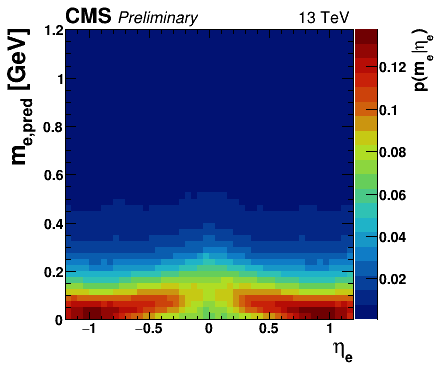

In [9]:
k = 'hmEvEta'
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
h[k] = ROOT.TH2F(k, k, 48, -1.2, 1.2, 48, 0., 1.2)

s = 'data2017'
for m,e in zip(ma[s],eta[s]):
    #print(m,p)
    if m < 0: continue
    h[k].Fill(e, m)
    #break

k = 'hmEvEta'
c[k].cd()
if make_2dpdf: h[k] = make_pdf(h[k])
#h[k], c[k] = set_hist(h[k], c[k], "#eta_{a}", "m_{a,pred} [GeV]", "m_{a,pred} vs. #eta_{a}")
h[k] = set_hist(h[k], "#eta_{e}", "m_{e,pred} [GeV]", "m_{e,pred} vs. #eta_{e}")
ROOT.gPad.SetTopMargin(0.08)
ROOT.gPad.SetBottomMargin(0.14)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.19)
ROOT.gStyle.SetPalette(55)#53
h[k].SetTitle('')
h[k].GetYaxis().SetTitleOffset(0.9)
h[k].GetYaxis().SetTitleSize(0.07)
h[k].GetZaxis().SetTitle('N_{e}')
h[k].GetZaxis().SetTitleOffset(1.3)
h[k].GetZaxis().SetTitleSize(0.05)
h[k].GetZaxis().SetTitleFont(62)
h[k].GetZaxis().SetLabelSize(0.04)
h[k].GetZaxis().SetLabelFont(62)
h[k].GetXaxis().SetTitleOffset(0.9)
h[k].GetXaxis().SetTitleSize(0.06)
#'''
if make_2dpdf:
    #ROOT.gPad.SetLeftMargin(0.15)
    #ROOT.gPad.SetRightMargin(0.2)
    h[k].GetZaxis().SetTitle("p(m_{e}|#eta_{e})")
    #h[k].GetZaxis().SetTitleOffset(1.35)
#else:
#    h[k].SetMaximum(60.)
#'''
h[k].Draw("COL Z")
CMS_lumi.CMS_lumi(c[k], iPeriod, iPos)
c[k].Draw()
if make_2dpdf:
    palette = h[k].GetListOfFunctions().FindObject("palette")
    palette.SetX1NDC(0.815)
    palette.SetX2NDC(0.865)
    palette.SetY2NDC(0.92)
#palette[k] = h[k].GetListOfFunctions().FindObject("palette")
#palette[k].SetX1NDC(0.84)
#palette[k].SetX2NDC(0.89)
#palette[k].SetY1NDC(0.12)
#palette[k].SetY2NDC(0.9)
#c[k].Update()
#if print_png: c[k].Print('%s/%sMeV.png'%(plot_dir, k))
if print_pdf: c[k].Print('%s/%s.pdf'%(plot_dir, k))

0.321095 55.222984
hmEvPU
13 TeV


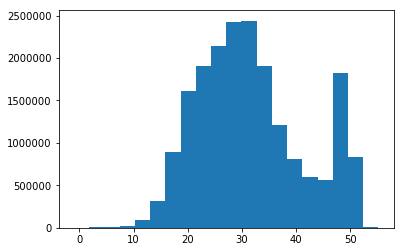

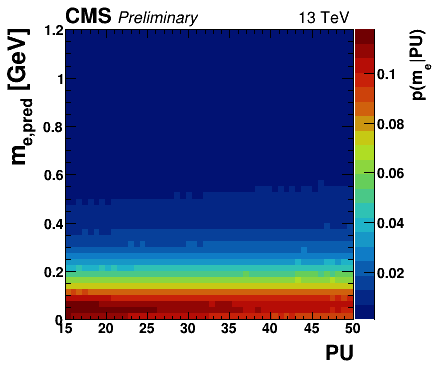

In [10]:
k = 'hmEvPU'
c[k] = ROOT.TCanvas("c%s"%k,"c%s"%k,wd,ht)
h[k] = ROOT.TH2F(k, k, 50, 15, 50, 48, 0., 1.2)

s = 'data2017'
print(np.min(pu[s][pu[s]>0.]), np.max(pu[s]))
for m,pu_ in zip(ma[s],pu[s]):
    #print(m,p)
    h[k].Fill(pu_, m)
    #break

k = 'hmEvPU'
print(k)
c[k].cd()
if make_2dpdf: h[k] = make_pdf(h[k])
#h[k], c[k] = set_hist(h[k], c[k], "PU", "m_{a,pred} [GeV]", "m_{a,pred} vs. PU")
h[k] = set_hist(h[k], "PU", "m_{e,pred} [GeV]", "m_{e,pred} vs. PU")
ROOT.gPad.SetTopMargin(0.08)
ROOT.gPad.SetBottomMargin(0.14)
ROOT.gPad.SetLeftMargin(0.15)
ROOT.gPad.SetRightMargin(0.19)
ROOT.gStyle.SetPalette(55)#53
h[k].SetTitle('')
h[k].GetYaxis().SetTitleOffset(0.9)
h[k].GetYaxis().SetTitleSize(0.07)
h[k].GetZaxis().SetTitle('N_{e}')
h[k].GetZaxis().SetTitleOffset(1.3)
h[k].GetZaxis().SetTitleSize(0.05)
h[k].GetZaxis().SetTitleFont(62)
h[k].GetZaxis().SetLabelSize(0.04)
h[k].GetZaxis().SetLabelFont(62)
h[k].GetXaxis().SetTitleOffset(0.9)
h[k].GetXaxis().SetTitleSize(0.06)
#'''
if make_2dpdf:
    #ROOT.gPad.SetLeftMargin(0.15)
    #ROOT.gPad.SetRightMargin(0.2)
    h[k].GetZaxis().SetTitle("p(m_{e}|PU)")
    #h[k].GetZaxis().SetTitleOffset(1.35)
#else:
#    h[k].SetMaximum(60.)
#'''
h[k].Draw("COL Z")
#h[k].SetMaximum(70.)
CMS_lumi.CMS_lumi(c[k], iPeriod, iPos)
c[k].Draw()
#palette = h[k].GetListOfFunctions().FindObject("palette")
#palette.SetX1NDC(0.808)
#palette.SetX2NDC(0.858)
#palette.SetY1NDC(0.13)
#palette.SetY2NDC(0.9)

#c[k].SetGrid()
#c[k].Draw()
#c[k].Update()
#if print_png: c[k].Print('%s/%sMeV.png'%(plot_dir, k))
if print_pdf: c[k].Print('%s/%s.pdf'%(plot_dir, k))
plt.hist(pu[s], bins=20)
plt.show()